# Gensim

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, re, operator, warnings, gensim, nltk
import numpy as np
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from pprint import pprint

warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

In [5]:
test_data_dir = '{}'.format(os.sep).join([gensim.__path__[0], 'test', 'test_data'])
lee_train_file = test_data_dir + os.sep + 'lee_background.cor'
with open(lee_train_file) as f:
    for n, l in enumerate(f):
        if n < 5:
            print([l])

['Hundreds of people have been forced to vacate their homes in the Southern Highlands of New South Wales as strong winds today pushed a huge bushfire towards the town of Hill Top. A new blaze near Goulburn, south-west of Sydney, has forced the closure of the Hume Highway. At about 4:00pm AEDT, a marked deterioration in the weather as a storm cell moved east across the Blue Mountains forced authorities to make a decision to evacuate people from homes in outlying streets at Hill Top in the New South Wales southern highlands. An estimated 500 residents have left their homes for nearby Mittagong. The New South Wales Rural Fire Service says the weather conditions which caused the fire to burn in a finger formation have now eased and about 60 fire units in and around Hill Top are optimistic of defending all properties. As more than 100 blazes burn on New Year\'s Eve in New South Wales, fire crews have been called to new fire at Gunning, south of Goulburn. While few details are available at t

In [6]:
def build_texts(fname):
    """
    Function to build tokenized texts from file
    
    Parameters:
    ----------
    fname: File to be read
    
    Returns:
    -------
    yields preprocessed line
    """
    with open(fname) as f:
        for line in f:
            yield gensim.utils.simple_preprocess(line, deacc=True, min_len=3)

In [7]:
train_texts = list(build_texts(lee_train_file))
train_texts


[['hundreds',
  'people',
  'have',
  'been',
  'forced',
  'vacate',
  'their',
  'homes',
  'the',
  'southern',
  'highlands',
  'new',
  'south',
  'wales',
  'strong',
  'winds',
  'today',
  'pushed',
  'huge',
  'bushfire',
  'towards',
  'the',
  'town',
  'hill',
  'top',
  'new',
  'blaze',
  'near',
  'goulburn',
  'south',
  'west',
  'sydney',
  'has',
  'forced',
  'the',
  'closure',
  'the',
  'hume',
  'highway',
  'about',
  'aedt',
  'marked',
  'deterioration',
  'the',
  'weather',
  'storm',
  'cell',
  'moved',
  'east',
  'across',
  'the',
  'blue',
  'mountains',
  'forced',
  'authorities',
  'make',
  'decision',
  'evacuate',
  'people',
  'from',
  'homes',
  'outlying',
  'streets',
  'hill',
  'top',
  'the',
  'new',
  'south',
  'wales',
  'southern',
  'highlands',
  'estimated',
  'residents',
  'have',
  'left',
  'their',
  'homes',
  'for',
  'nearby',
  'mittagong',
  'the',
  'new',
  'south',
  'wales',
  'rural',
  'fire',
  'service',
  'says

In [8]:
bigram = gensim.models.Phrases(train_texts)  # for bigram collocation detection

In [9]:
from gensim.utils import lemmatize
from nltk.corpus import stopwords
nltk.download('stopwords') # Let's make sure the 'stopword' package is downloaded & updated
nltk.download('wordnet') # Let's also download wordnet, which will be used for lemmatization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jonathan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
stops = set(stopwords.words('english'))  # nltk stopwords list

In [11]:
def process_texts(texts):
    """
    Function to process texts. Following are the steps we take:
    
    1. Stopword Removal.
    2. Collocation detection.
    3. Lemmatization (not stem since stemming can reduce the interpretability).
    
    Parameters:
    ----------
    texts: Tokenized texts.
    
    Returns:
    -------
    texts: Pre-processed tokenized texts.
    """
    texts = [[word for word in line if word not in stops] for line in texts]
    texts = [bigram[line] for line in texts]
    
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()

    texts = [[word for word in lemmatizer.lemmatize(' '.join(line), pos='v').split()] for line in texts]
    return texts

In [12]:
train_texts = process_texts(train_texts)
train_texts[5:6]

[['federal_government',
  'says',
  'safe',
  'afghani',
  'asylum_seekers',
  'australia',
  'return',
  'home',
  'environment',
  'becomes',
  'secure',
  'government',
  'suspended',
  'applications',
  'interim_government',
  'established',
  'kabul',
  'foreign_affairs',
  'minister_alexander',
  'downer',
  'refused',
  'say',
  'long',
  'claims',
  'process',
  'put',
  'hold',
  'says',
  'major',
  'threat',
  'people',
  'seeking',
  'asylum',
  'longer',
  'many',
  'afghans',
  'tried',
  'get',
  'australia',
  'matter',
  'britain',
  'countries',
  'north',
  'west',
  'europe',
  'claimed',
  'fleeing',
  'taliban',
  'said',
  'well',
  'taliban',
  'longer',
  'power',
  'afghanistan',
  'taliban',
  'finished',
  'meanwhile',
  'mass',
  'airlift',
  'detainees',
  'christmas',
  'island',
  'pacific',
  'island',
  'nauru',
  'total',
  'people',
  'flown',
  'island',
  'two',
  'operations',
  'using',
  'chartered',
  'aircraft',
  'second',
  'airlift',
  'tod

In [13]:
dictionary = Dictionary(train_texts)
corpus = [dictionary.doc2bow(text) for text in train_texts]

## LSI Model

In [14]:
lsimodel = LsiModel(corpus=corpus, num_topics=10, id2word=dictionary)
lsimodel.show_topics(num_topics=5, formatted = False)  # Showing only the top 5 topics

[(0,
  [('said', 0.5423505719293172),
   ('says', 0.34948639718920765),
   ('arafat', 0.1267956958208872),
   ('palestinian', 0.12216172814288634),
   ('people', 0.11792688606535054),
   ('israeli', 0.11655021030671003),
   ('two', 0.11194060443335548),
   ('australian', 0.1097812510463389),
   ('also', 0.10961658305402745),
   ('australia', 0.10680647008095948)]),
 (1,
  [('says', 0.4075134028508419),
   ('arafat', -0.32151528272329016),
   ('palestinian', -0.3146296047704845),
   ('israeli', -0.2728629812930322),
   ('israel', -0.19215860200682325),
   ('sharon', -0.17255357896333356),
   ('australia', 0.14496769262249762),
   ('australian', 0.14344240460340268),
   ('west_bank', -0.13969889969574045),
   ('hamas', -0.13619568418898603)]),
 (2,
  [('says', -0.34867091146699847),
   ('said', 0.330233696781422),
   ('afghanistan', 0.20282477141262578),
   ('bin_laden', 0.19110530169594614),
   ('taliban', 0.17867108476889748),
   ('pakistan', 0.16962749033091096),
   ('australia', -0.1

## HDP Model

In [15]:
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel.show_topics(formatted = False)

[(0,
  [('krishna', 0.0025251146201852523),
   ('storm', 0.0023081665951128223),
   ('said', 0.0022696763775290154),
   ('says', 0.002237615809898032),
   ('ashes', 0.002218478126078987),
   ('hare', 0.0021183404502516626),
   ('benares', 0.0020810925706681374),
   ('trees', 0.001986557950945858),
   ('two', 0.0019488039318217771),
   ('take', 0.0019116679311468564),
   ('sydney', 0.001758255978570555),
   ('ceremony', 0.0017454979618856234),
   ('ses', 0.0017149288185397263),
   ('brought', 0.0017118793600640128),
   ('harrison', 0.0017021891849426413),
   ('ganges', 0.0016639618136251187),
   ('party', 0.0014862425244737984),
   ('north', 0.0014687294869388944),
   ('large', 0.0014187984750456345),
   ('hundreds', 0.0013735918879978174)]),
 (1,
  [('arafat', 0.0034387299927386224),
   ('says', 0.0029991139254041993),
   ('said', 0.0028882824980149087),
   ('sharon', 0.0028648380772609834),
   ('israeli', 0.0025789302124599586),
   ('palestinian', 0.0024253301787069735),
   ('governme

## LDA Model

In [16]:
ldamodel = LdaModel(corpus=corpus, num_topics=10, id2word=dictionary)
ldamodel.show_topics(formatted=False)

[(0,
  [('says', 0.012882014),
   ('government', 0.005262795),
   ('said', 0.004504456),
   ('police', 0.0033729314),
   ('new', 0.0033093195),
   ('area', 0.0027873286),
   ('people', 0.0026694415),
   ('united_states', 0.002629439),
   ('centre', 0.0023836447),
   ('first', 0.0023740227)]),
 (1,
  [('says', 0.011818756),
   ('said', 0.0113566285),
   ('australian', 0.004649677),
   ('australia', 0.0042021717),
   ('people', 0.0037530484),
   ('today', 0.0032934016),
   ('one', 0.003091944),
   ('government', 0.0027068246),
   ('morning', 0.0025356142),
   ('police', 0.0025181065)]),
 (2,
  [('said', 0.01225298),
   ('says', 0.006050555),
   ('three', 0.004946259),
   ('first', 0.004899033),
   ('two', 0.004763922),
   ('one', 0.0046928753),
   ('israeli', 0.004197526),
   ('people', 0.0040500574),
   ('palestinian', 0.0036662924),
   ('arafat', 0.0034068201)]),
 (3,
  [('says', 0.008722218),
   ('said', 0.008607502),
   ('government', 0.0053799176),
   ('australian', 0.0045335065),
 

In [18]:
import pyLDAvis.gensim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:972: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\decomposition\nmf.py:1186: DeprecationWarning: invalid escape sequence \s
  """
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\t_sne.py:420: DeprecationWarning: invalid escape sequence \s
  """


In [20]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.033144 -0.012070       1        1  15.846713
1      0.020218  0.020646       2        1  14.573476
6     -0.007287  0.044371       3        1  13.655975
5     -0.016270  0.004314       4        1  11.794096
4     -0.005759  0.020893       5        1   9.557234
3      0.048220  0.014079       6        1   8.829915
9     -0.046378 -0.008409       7        1   8.339716
8      0.002559 -0.022918       8        1   8.128951
7      0.023174 -0.049444       9        1   5.085419
0      0.014667 -0.011461      10        1   4.188501, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
99    Default  340.000000           says  340.000000  30.0000  30.0000
258   Default   96.000000     government   96.000000  29.0000  29.0000
98    Default  385.000000           said  385.000000  28.0000  28.0000
175   Default   61.000000         police   61.000000  27.0000  27.0000
6364  Default    7.000000          virus    7.000000  26.0000  26.0000
1500  Default   33.000000         report   33.000000  25.0000  25.0000
356   Default  116.000000      australia  116.000000  24.0000  24.0000
80    Default   70.000000            new   70.000000  23.0000  23.0000
2     Default   34.000000           area   34.000000  22.0000  22.0000
171   Default   36.000000       pakistan   36.000000  21.0000  21.0000
3522  Default   18.000000          labor   18.000000  20.0000  20.0000
110   Default   46.000000         sydney   46.000000  19.0000  19.0000
220   Default    9.000000           road    9.000000  18.0000  18.0000
528   Default   60.000000  united_states   60.000000  17.0000  17.0000
150   Default   28.000000          india   28.000000  16.0000  16.0000
450   Default   75.000000          first   75.000000  15.0000  15.0000
366   Default   21.000000      detainees   21.000000  14.0000  14.0000
55    Default    7.000000        highway    7.000000  13.0000  13.0000
1476  Default   34.000000         centre   34.000000  12.0000  12.0000
405   Default   39.000000        taliban   39.000000  11.0000  11.0000
891   Default   27.000000          union   27.000000  10.0000  10.0000
4228  Default   12.000000          space   12.000000   9.0000   9.0000
241   Default   64.000000          could   64.000000   8.0000   8.0000
1497  Default   15.000000           rate   15.000000   7.0000   7.0000
986   Default  120.000000     australian  120.000000   6.0000   6.0000
199   Default   23.000000         troops   23.000000   5.0000   5.0000
200   Default  101.000000            two  101.000000   4.0000   4.0000
1711  Default   17.000000          party   17.000000   3.0000   3.0000
5192  Default    4.000000           drug    4.000000   2.0000   2.0000
303   Default   82.000000          would   82.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
258   Topic10    7.079403     government   96.085037   0.5648  -5.2471
359   Topic10    2.117789        britain   15.138981   1.2059  -6.4539
1565  Topic10    1.185618        related    6.120899   1.5314  -7.0340
150   Topic10    2.992540          india   28.289764   0.9264  -6.1082
175   Topic10    4.537198         police   61.700253   0.5628  -5.6920
2484  Topic10    1.461256           cost    8.779684   1.3797  -6.8250
1476  Topic10    3.206430         centre   34.414970   0.7995  -6.0391
80    Topic10    4.451629            new   70.669380   0.4081  -5.7110
528   Topic10    3.537067  united_states   60.187706   0.3387  -5.9410
2533  Topic10    2.363131      tora_bora   25.928514   0.7775  -6.3443
278   Topic10    2.807180      president   42.794930   0.4486  -6.1721
202   Topic10    2.390186            war   32.083988   0.5758  -6.3329
180   Topic10    2.986173            say   55.665943   0.2475  -6.1103
98    Topic10    6.059302           said  3

In [21]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

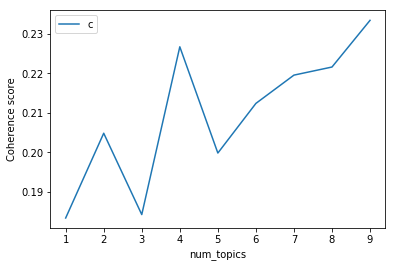

Wall time: 1min 23s


In [22]:

%%time
lmlist, c_v = evaluate_graph(dictionary=dictionary, corpus=corpus, texts=train_texts, limit=10)

In [23]:
pyLDAvis.gensim.prepare(lmlist[2], corpus, dictionary)

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.018789 -0.005534       1        1  48.597832
1     -0.015043 -0.011038       2        1  28.110954
0     -0.003746  0.016572       3        1  23.291216, topic_info=     Category        Freq           Term       Total  loglift  logprob
term                                                                  
99    Default  337.000000           says  337.000000  30.0000  30.0000
258   Default   90.000000     government   90.000000  29.0000  29.0000
356   Default  110.000000      australia  110.000000  28.0000  28.0000
278   Default   40.000000      president   40.000000  27.0000  27.0000
956   Default   63.000000        israeli   63.000000  26.0000  26.0000
4228  Default   12.000000          space   12.000000  25.0000  25.0000
1500  Default   30.000000         report   30.000000  24.0000  24.0000
98    Default  386.000000           said  386.000000  23.0000  23.0000
2738  Default   52.000000        company   52.000000  22.0000  22.0000
150   Default   27.000000          india   27.000000  21.0000  21.0000
303   Default   82.000000          would   82.000000  20.0000  20.0000
2115  Default   10.000000         cancer   10.000000  19.0000  19.0000
986   Default  119.000000     australian  119.000000  18.0000  18.0000
1476  Default   33.000000         centre   33.000000  17.0000  17.0000
3886  Default   22.000000         unions   22.000000  16.0000  16.0000
2780  Default   29.000000         qantas   29.000000  15.0000  15.0000
337   Default   30.000000          staff   30.000000  14.0000  14.0000
824   Default   20.000000        general   20.000000  13.0000  13.0000
537   Default   44.000000          world   44.000000  12.0000  12.0000
80    Default   71.000000            new   71.000000  11.0000  11.0000
574   Default   91.000000           also   91.000000  10.0000  10.0000
873   Default   25.000000         saying   25.000000   9.0000   9.0000
4230  Default   15.000000        station   15.000000   8.0000   8.0000
2027  Default    7.000000      endeavour    7.000000   7.0000   7.0000
300   Default   22.000000           week   22.000000   6.0000   6.0000
366   Default   18.000000      detainees   18.000000   5.0000   5.0000
4226  Default    6.000000        shuttle    6.000000   4.0000   4.0000
450   Default   74.000000          first   74.000000   3.0000   3.0000
200   Default   98.000000            two   98.000000   2.0000   2.0000
1217  Default   16.000000        airline   16.000000   1.0000   1.0000
...       ...         ...            ...         ...      ...      ...
619    Topic3    7.001771     last_night   17.228813   0.5567  -6.9739
1454   Topic3    5.266307       november   12.154696   0.6207  -7.2587
80     Topic3   20.425400            new   71.480225   0.2045  -5.9032
363    Topic3    5.299649      countries   12.299002   0.6152  -7.2524
200    Topic3   23.808079            two   98.850327   0.0335  -5.7500
180    Topic3   15.231268            say   54.604927   0.1803  -6.1967
956    Topic3   16.830072        israeli   63.492607   0.1293  -6.0968
574    Topic3   21.549749           also   91.662621   0.0093  -5.8497
450    Topic3   18.475386          first   74.207748   0.0667  -6.0036
131    Topic3   11.292491         attack   37.137753   0.2666  -6.4959
151    Topic3    8.363608         indian   24.509373   0.3819  -6.7961
318    Topic3   10.205246          hours   33.304821   0.2743  -6.5971
299    Topic3   15.357574           told   63.308384   0.0407  -6.1884
113    Topic3   15.336147          today   65.518021   0.0050  -6.1898
303    Topic3   17.237692          would   82.024345  -0.1028  -6.0729
537    Topic3   11.684184          world   44.566265   0.1184  -6.4618
842    Topic3   10.835211        meeting   39.612404   0.1608  -6.5372
241    Topic3   14.436728          could   64.726608  -0.0433  -6.2502
1171   Topic3   12.707579            man   53.802994   0.0140  -6.

In [24]:
lmlist[5].show_topics(formatted=False)

[(0,
  [('says', 0.011433176),
   ('said', 0.0095466785),
   ('government', 0.0039876355),
   ('australia', 0.0039403555),
   ('australian', 0.0035824704),
   ('two', 0.0034272345),
   ('also', 0.0033659146),
   ('people', 0.0031922571),
   ('company', 0.0028464557),
   ('first', 0.002696723)]),
 (1,
  [('says', 0.012792302),
   ('said', 0.008633735),
   ('australia', 0.0070900163),
   ('one', 0.0056972797),
   ('australian', 0.003782343),
   ('also', 0.0035563179),
   ('people', 0.003113753),
   ('two', 0.002900932),
   ('united_states', 0.0028487092),
   ('test', 0.002690718)]),
 (2,
  [('said', 0.013512898),
   ('says', 0.007957038),
   ('told', 0.0034695233),
   ('australian', 0.0033478339),
   ('people', 0.0032564914),
   ('israeli', 0.0030450807),
   ('two', 0.0028839244),
   ('one', 0.0028008467),
   ('would', 0.0027717396),
   ('company', 0.002592569)]),
 (3,
  [('said', 0.008624261),
   ('says', 0.007049145),
   ('two', 0.0034530542),
   ('palestinian', 0.0032624276),
   ('peo